In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene, pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocess (Again)

In [2]:
df = pd.read_csv(r"C:\Users\viole\Desktop\Datasets\gform_scraped_data.csv")
df

,Name,Age,Idol Preference,Reason,Label
0,Mahika D,18 - 30,Clay (Biodegradable),Better for the environment and looks natural t...,positive
1,Vaibhavi,18 - 30,Clay (Biodegradable),it's an eco friendly material and it's good to...,positive
2,Atharva,18 - 30,Clay (Biodegradable),We sculpt the idol ourselves,neutral
3,Varnika,18 - 30,Clay (Biodegradable),No chemicals involved and eco friendly,positive
4,Srujana A Rao,18 - 30,Colored (Non Biodegradable),Festivals symbolize happiness and to me the pl...,positive
...,...,...,...,...,...
449,Meena,30-50,Colored (Non Biodegradable),It looks better,negative
450,Jignesh,50-70,Colored (Non Biodegradable),It completes the look,neutral
451,Gopal,30-50,Colored (Non Biodegradable),It is a festival cheer,neutral
452,Veena,30-50,Colored (Non Biodegradable),It is a festival cheer,neutral


In [3]:
df.rename(columns={'Reason': 'Comment', 
                   'Label': 'Sentiment'}, 
          inplace=True)

In [4]:
start_date = pd.to_datetime('2024-08-15')
end_date = pd.to_datetime('2024-09-15')

# Number of random dates to generate (same as the number of rows in your DataFrame)
num_rows = len(df)

# Generate random dates using np.random.uniform() for large number handling
df['Date'] = pd.to_datetime(np.random.uniform(start_date.value, end_date.value, num_rows)).date

df.head()

,Name,Age,Idol Preference,Comment,Sentiment,Date
0,Mahika D,18 - 30,Clay (Biodegradable),Better for the environment and looks natural t...,positive,2024-08-28
1,Vaibhavi,18 - 30,Clay (Biodegradable),it's an eco friendly material and it's good to...,positive,2024-09-12
2,Atharva,18 - 30,Clay (Biodegradable),We sculpt the idol ourselves,neutral,2024-09-05
3,Varnika,18 - 30,Clay (Biodegradable),No chemicals involved and eco friendly,positive,2024-09-04
4,Srujana A Rao,18 - 30,Colored (Non Biodegradable),Festivals symbolize happiness and to me the pl...,positive,2024-08-24


In [9]:
df1 = pd.read_csv(r"C:\Users\viole\Desktop\Datasets\final_scraped_data.csv")
df1 = df1.drop("Label", axis=1)

In [10]:
df1.rename(columns={'Ganesha idol type': 'Idol Preference', 
                   'sentiment': 'Sentiment'}, 
          inplace=True)
num_rows = len(df1)
df1['Date'] = pd.to_datetime(np.random.uniform(start_date.value, end_date.value, num_rows)).date

In [11]:
df1.head()

,User_ID,Data source,Idol Preference,Comment,Sentiment,Date
0,3zormd3w,Reddit,Clay Ganesha,hold glass higher,0,2024-09-06
1,qj7yprba,Reddit,Clay Ganesha,"... nice work op , look bit sus .",1,2024-08-26
2,uh7624vm,Reddit,Clay Ganesha,'s nice ...,1,2024-09-09
3,dzotncpa,Reddit,Clay Ganesha,... ummm ....... n ... nice work op,1,2024-09-07
4,Anonymous,Reddit,Clay Ganesha,"offend anyone , 'm curious 's liquid ? ­",1,2024-09-02


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string, re

def preprocess_text(text):

    text = str(text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['Comment'] = df['Comment'].apply(preprocess_text)
df1['Comment'] = df1['Comment'].apply(preprocess_text)
df['Sentiment'] = df['Sentiment'].map({
    'positive': 1,
    'negative': -1,
    'neutral': 0
})
df.head()

,Name,Age,Idol Preference,Comment,Sentiment,Date
0,Mahika D,18 - 30,Clay (Biodegradable),better environment look natural,1,2024-08-28
1,Vaibhavi,18 - 30,Clay (Biodegradable),'s eco friendly material 's good environmental...,1,2024-09-12
2,Atharva,18 - 30,Clay (Biodegradable),sculpt idol,0,2024-09-05
3,Varnika,18 - 30,Clay (Biodegradable),chemical involved eco friendly,1,2024-09-04
4,Srujana A Rao,18 - 30,Colored (Non Biodegradable),festival symbolize happiness plain clay ganesh...,1,2024-08-24


In [22]:
df1.head()

,User_ID,Data source,Idol Preference,Comment,Sentiment,Date
0,3zormd3w,Reddit,Clay Ganesha,hold glass higher,0,2024-09-06
1,qj7yprba,Reddit,Clay Ganesha,... nice work op look bit sus,1,2024-08-26
2,uh7624vm,Reddit,Clay Ganesha,'s nice ...,1,2024-09-09
3,dzotncpa,Reddit,Clay Ganesha,... ummm ....... n ... nice work op,1,2024-09-07
4,Anonymous,Reddit,Clay Ganesha,offend anyone 'm curious 's liquid ­,1,2024-09-02


### Statistics 

In [24]:
#gform
sentiment_scores = df['Sentiment'].values

benchmark_value = 0.0 
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)
print(mean_score, std_dev, n)

0.2488986784140969 0.6757784315939072 454


Shapiro-Wilk Test Statistic: 0.7850, P-Value: 0.0000
Data is not normally distributed (Reject H0).


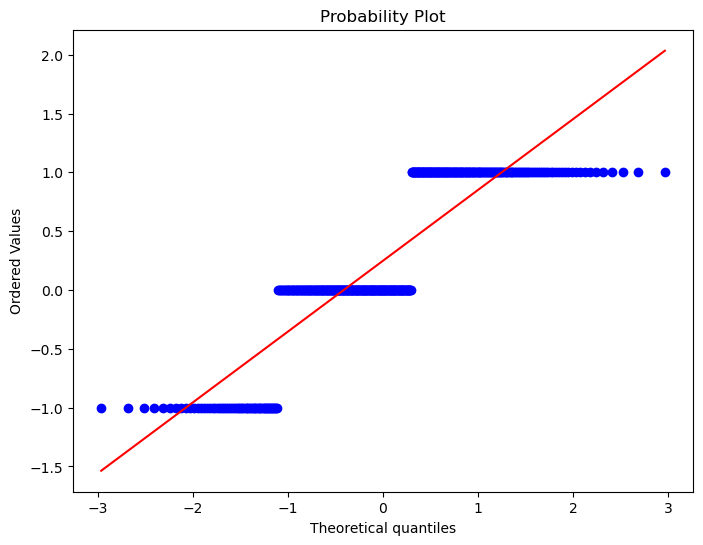

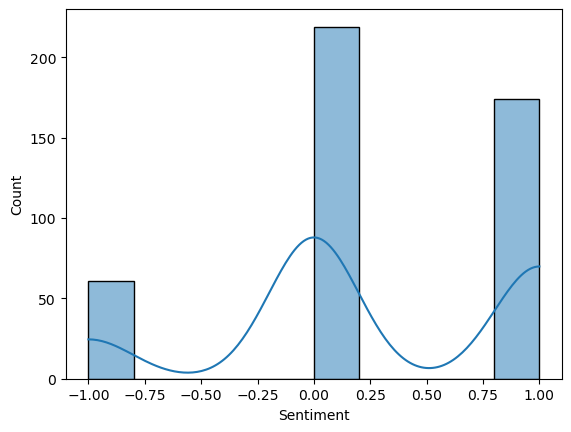

In [26]:
#gform
sentiment_scores = df['Sentiment']
# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogram

sns.histplot(sentiment_scores, kde=True)
plt.show()

In [27]:
#scrape
sentiment_scores = df1['Sentiment'].values

benchmark_value = 0.0 
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)
print(mean_score, std_dev, n)

0.6528301886792452 0.4761344764227974 3710


Shapiro-Wilk Test Statistic: 0.6017, P-Value: 0.0000
Data is not normally distributed (Reject H0).


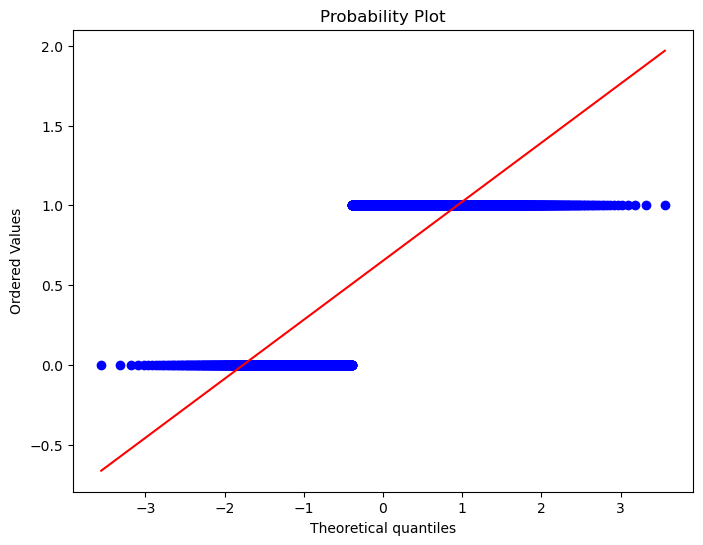

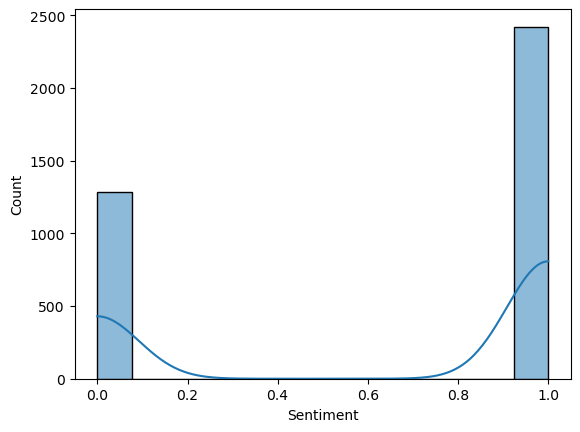

In [28]:
#scape
sentiment_scores = df1['Sentiment']
# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogram

sns.histplot(sentiment_scores, kde=True)
plt.show()

In [31]:
#scrape
grouped_sentiments = [group['Sentiment'] for name, group in df1.groupby('Data source')]
# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
    print("Variances are equal (Fail to reject H0).")
else:
    print("Variances are not equal (Reject H0).")

Levene's Test Statistic: 3.2364, P-Value: 0.0011
Variances are not equal (Reject H0).


In [34]:
#scrape
from scipy.stats import kruskal
h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value:{kruskal_p_value:.4f}")
if kruskal_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

Kruskal-Wallis H Statistic: 25.7668, P-Value:0.0012
Reject the null hypothesis: There is a significant difference between the groups.


In [36]:
#gform
df['comment_length'] = df['Comment'].apply(len)

# If you have a timestamp or timing information, ensure it's in a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['Sentiment'], df['comment_length'])

spearman_corr, spearman_p_value = spearmanr(df['Sentiment'], df['comment_length'])

print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f},P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length:{spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

Pearson Correlation between Sentiment and Comment Length: 0.2973,P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length:0.3940, P-Value: 0.0000


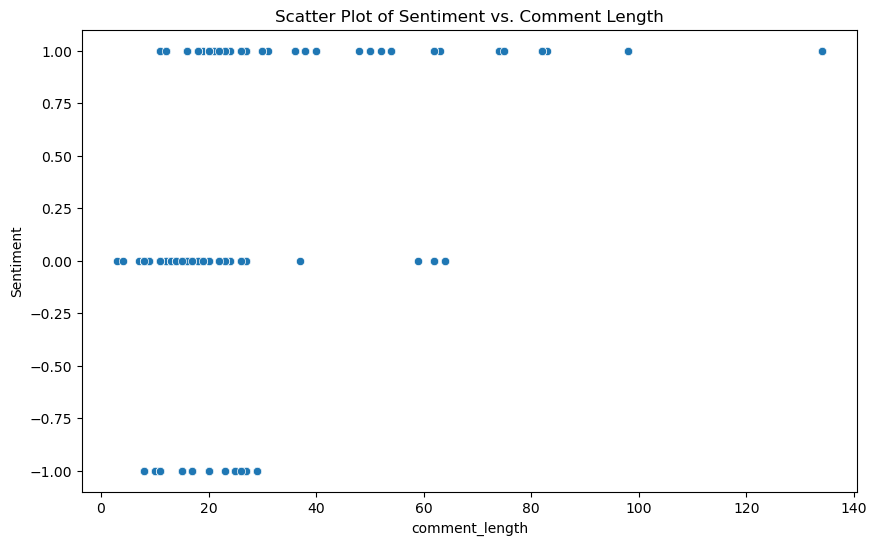

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.show()

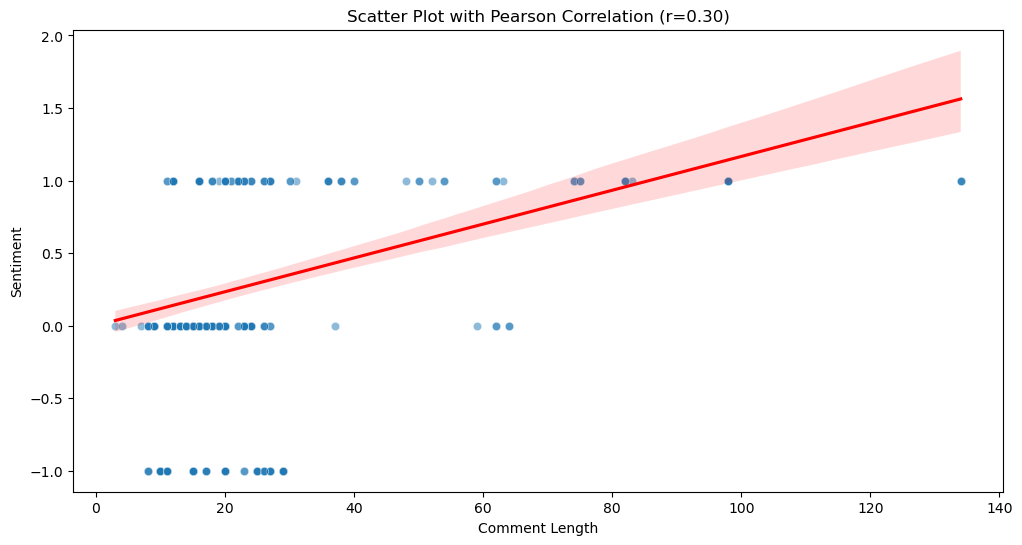

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='Sentiment', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

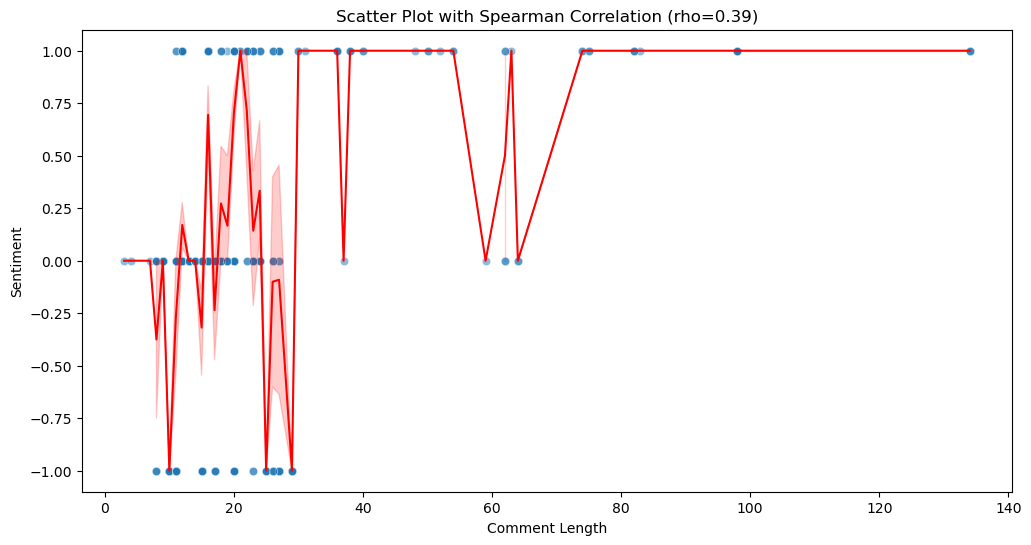

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='Sentiment',
data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

In [40]:
#scrape
df1['comment_length'] = df1['Comment'].apply(len)

# If you have a timestamp or timing information, ensure it's in a datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df1['Sentiment'], df1['comment_length'])

spearman_corr, spearman_p_value = spearmanr(df1['Sentiment'], df1['comment_length'])

print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f},P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length:{spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

Pearson Correlation between Sentiment and Comment Length: 0.2073,P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length:0.2921, P-Value: 0.0000


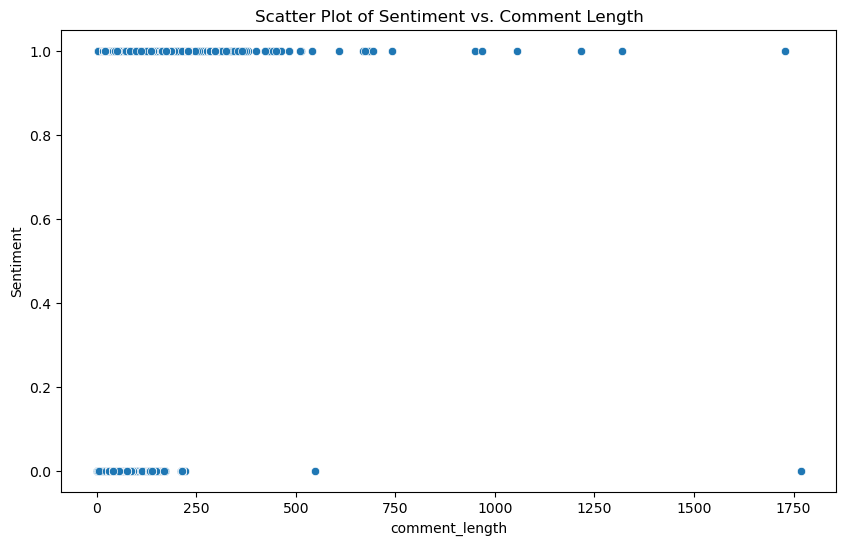

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df1)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.show()

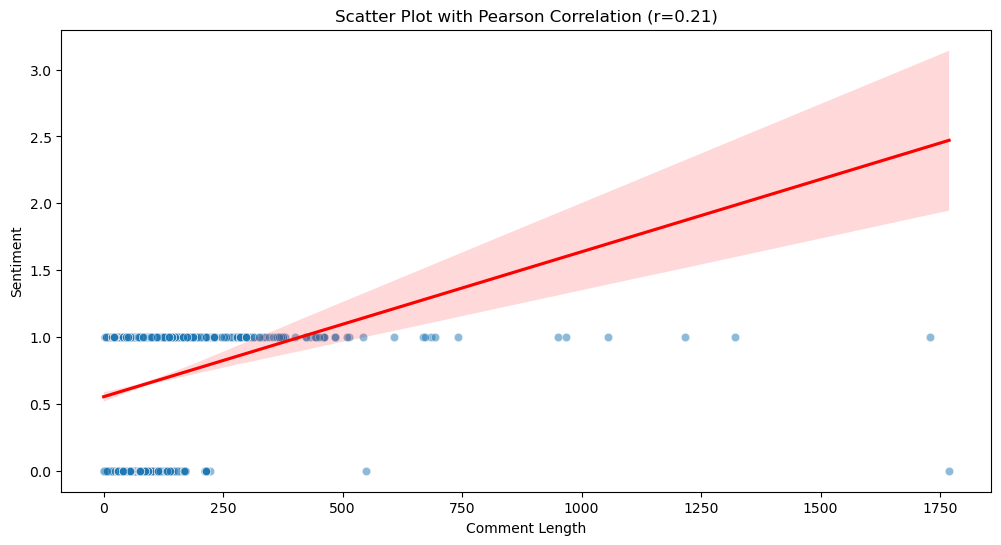

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df1, alpha=0.5)
sns.regplot(x='comment_length', y='Sentiment', data=df1, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

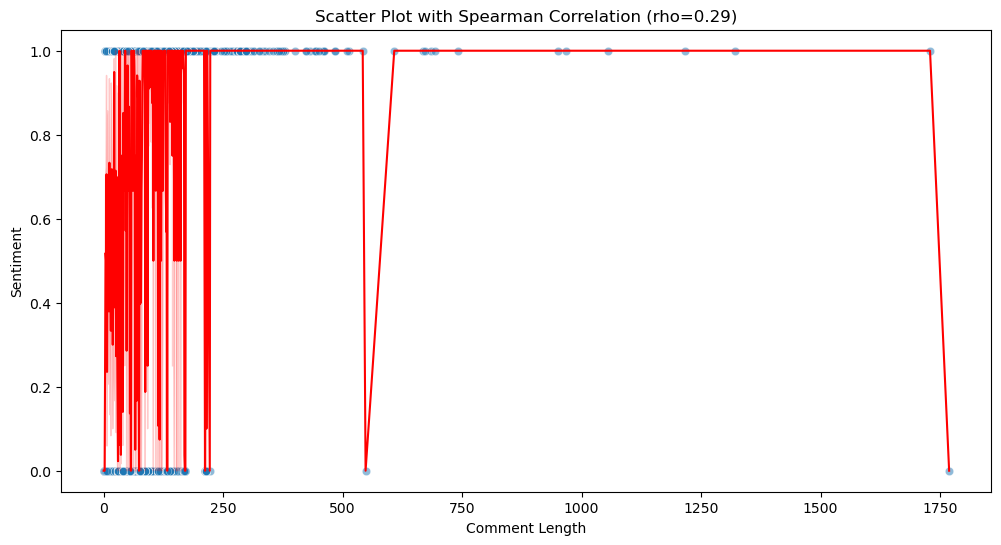

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df1, alpha=0.5)
sns.lineplot(x='comment_length', y='Sentiment',
data=df1.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()